# TME 5.1 : Deep Learning - programmer et entraîner un neurone artificiel


## Recherche de pattern (motifs) en utilisant de réseau de neurones

Nous allons reprogrammer un neurone artificiel et l'algorithme de back propagation pour reconnaître un motif particulier 
Pour comprendre le principe nous utiliserons des données simulées générées à partir de matrice de fréquences d'un motif d'intérêt,
étiquetées avec 1 (les séquences ne contiennent le motif) et des séquences aléatoires, étiquetées avec 0 (les séquences ne contiennent pas le motif).
Notre objectif est de construire un classifieur capable de prédire si une séquence particulière contient le motif d'intérêt.

## 1. Préparation de données
1.1 Nous allons d'abord générer des données artificielles, un jeu de données de séquences ayant le motif (positives = label 1) et un jeu de données de séquences aléatoires (négatives = label 0). Pour générer les séquences positives, utilisez la matrice de fréquence du motif AGTATAG.Pour générer les séquences négatives une distribution uniforme ou les nucléotides sont choisis aléatoirement.Générer 100 séquences positives et 100 séquences négatives. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

motif_length = 7
num_sample = 100

MotifConsensus = "AGTATAG"

freq = np.array([
  [1000,  12,   3,  1000,   5,   1000,   1],
  [10,    8,   3,   3,   0,    10,   1],
  [4,   1000,   2,   7,   5,    13,   1000],
  [6,    10,  1000,   5,   1000,   6,   1]], dtype=object)

def generatePWM(MF):
    """
    Transforme la matrice de fréquence en PWM
    entrée MF: matrice de fréquence
    sortie PWM: matrice de probabilité (poids positions)
    """
    
    nbLigne = len(MF)
    nbColonne = len(MF[0])
    PWM= np.zeros((nbLigne, nbColonne))
   
    #Calcule du nombre fréquence par colonne 
    fr = []
    for c in range(nbColonne):
        tmp=0
        for l in range(nbLigne):
            tmp=tmp + MF[l,c]
        fr.append(tmp)
    
    #Pour chaque ligne on boucle sur les colonne et divison chaque cellule par fréquence de sa colonne
    for l in range(nbLigne): 
        for c in range(nbColonne):
            PWM[l,c]=MF[l,c]/fr[c]
            
    return PWM

#Transformer freq en matrice de poids position
PWM = generatePWM(freq)
print(PWM)

[[9.80392157e-01 1.16504854e-02 2.97619048e-03 9.85221675e-01
  4.95049505e-03 9.71817298e-01 9.97008973e-04]
 [9.80392157e-03 7.76699029e-03 2.97619048e-03 2.95566502e-03
  0.00000000e+00 9.71817298e-03 9.97008973e-04]
 [3.92156863e-03 9.70873786e-01 1.98412698e-03 6.89655172e-03
  4.95049505e-03 1.26336249e-02 9.97008973e-01]
 [5.88235294e-03 9.70873786e-03 9.92063492e-01 4.92610837e-03
  9.90099010e-01 5.83090379e-03 9.97008973e-04]]


In [2]:
import random
#nuc = ('A', 'C', 'G', 'T')        TEST 
#n= random.choice(nuc)
#print(n)

In [3]:
def createArtSequences(freq, num_sample=100):
    """
    Genere deux jeux de sequences: positives (ayant le motif) et negatives (aleatoires)
    entrée PWM : matrice de poids position qui represent le motif d'interet
    entrée num_sample : int, nombre d'echantillons
    sortie pos : list contenant les sequences positives
    sortie neg : list contenant les sequences negatives
    """
    
    #Par rapport à la matrice de fréquence d'entrée on détermine dans un premier temps le motif le plus probable pour l'implanté dans les séquences de classe 1 (pos)... on reconstruit le motif 
    #Pour ça on détermine pour chaque colonne de freq la proba la plus importante, si elle est est en posligne 1 = 'A', posligne 2='T', posligne 3='G', posligne 4='C'
    
    motif= ''
    nuc = ('A', 'C', 'G', 'T')
    nbLigne = len(freq)
    nbColonne = len(freq[0])
    for c in range(nbColonne):
        indBestprob=0
        Bestprob=0
        for l in range(nbLigne):
            if (freq[l,c]>Bestprob):
                Bestprob=freq[l,c]
                indBestprob=l
        motif+=nuc[indBestprob]
    #print(motif) C'est bien AGTATAG
    
    
    #Boucle pour créer les 100 séquences pour pos et neg en paralléle
    pos = []
    neg = []
    n=10 #TailleSéquenceGénerer REMETTRE À 80 PLUS TARD 
    lenmotif=len(motif)
    lenseqpostmp= n-lenmotif #Taille de la séquence de classe positive sans le motif implanté
    
    for i in range(num_sample):
        seqtmppos=''
        seqtmpneg=''
        for i in range (n):#Boucle pour créer 2 séquences en parallele cad une pour pos et une autre pour neg, la séquence pour pos aura le motif le plus probable d'aprés la matrice freq qui lui sera implanté aléatoirement   
            #CasSéquencePourNeg
            nucneg=random.choice(nuc)
            seqtmpneg+=nucneg
            
            #CasSéquencePourPos
            if (i<lenseqpostmp):
                nucpos=random.choice(nuc)
                seqtmppos+=nucpos
                
            #Ajout du motif à la sequence positive jusqu'à présent créer
            if(i==lenseqpostmp):
                #Implémentation aléatoire du motif en tirant aléatoirement un indice entre 0 et lenseqpostmp
                randind= random.randint(0, lenseqpostmp)
                seqtmppos= seqtmppos[:randind] + motif + seqtmppos[randind:]  
        
        pos.append(seqtmppos)
        neg.append(seqtmpneg)
        
    return pos, neg

pos, neg  = createArtSequences(freq, num_sample)
print("POSSSSSSSS\n", pos)
print("NEGGGGGGGG\n",neg)

POSSSSSSSS
 ['AGTATAGAAT', 'TAGTATAGAG', 'ATAGTATAGT', 'AGTATAGGCT', 'AGTATAGCGT', 'AGTATAGCAA', 'CTGAGTATAG', 'AGTATAGGCC', 'AAGTATAGTA', 'TCGAGTATAG', 'AGTATAGCCG', 'GGAGTATAGG', 'GTAGTATAGG', 'GCAGTATAGC', 'CGCAGTATAG', 'TAGTATAGTT', 'CTAGTATAGC', 'CCGAGTATAG', 'AGTATAGGCC', 'ACAGTATAGC', 'GCTAGTATAG', 'CGAGTATAGG', 'GAGTATAGCT', 'AGTATAGAGC', 'CAGTATAGTC', 'TAGTATAGAG', 'AGTATAGCCT', 'AGTATAGCAC', 'TAGTATAGTA', 'AGTATAGTGT', 'CCGAGTATAG', 'AGTATAGGGT', 'TAGTATAGTC', 'CGTAGTATAG', 'TAGTATAGAG', 'TGCAGTATAG', 'GTAGTATAGG', 'AGTATAGTAT', 'AATAGTATAG', 'GCAAGTATAG', 'GTAGTATAGT', 'GAAGTATAGT', 'AGTATAGACG', 'ATAGTATAGA', 'AAGTATAGAG', 'CTAAGTATAG', 'GAGTATAGTG', 'CAGTATAGGG', 'AGTATAGCAC', 'CACAGTATAG', 'CAAGTATAGA', 'TTAAGTATAG', 'GAGTATAGAG', 'AGCAGTATAG', 'CCAGTATAGC', 'AGAGTATAGT', 'GAGTATAGGT', 'AGTATAGCCC', 'TAGTATAGAG', 'CAGTATAGCC', 'TCAGTATAGC', 'GACAGTATAG', 'AGTATAGGAC', 'CAAGTATAGA', 'AGTATAGTAT', 'CGTAGTATAG', 'ACAGTATAGC', 'AGAGTATAGC', 'ACAGTATAGG', 'AGTATAGGTG', 'TAAGTA

1.2 Générer le vecteur y contenant les labels de séquences générer à la question précédente, séquences positives = label 1, et négatives = label 0. Pour simplifier les prochain calculs y doit être un numpy array de dimension (num_sample*2, 1)

In [4]:
#Création de la matrice à num_sample*2 ligne et 1 colonne
y= np.zeros((num_sample*2, 1))

#Les labels sont tous à 0 initialement car np.zeros, ainsi on initialise les lignes de 0 à 99 avec un label positive 
nbLigne = len(y)
nbColonne = len(y[0])

for c in range(nbColonne):
    for l in range(num_sample):
        y[l,c]=1

#print(y)

1.3 Nous allons créer notre matrice X contenant deux features, pour simplifier x1 sera le nombre de AG et x2 le nombre de TA. Par exemple, pour la séquence AGAGTAG, x1 = 3 et x2=1

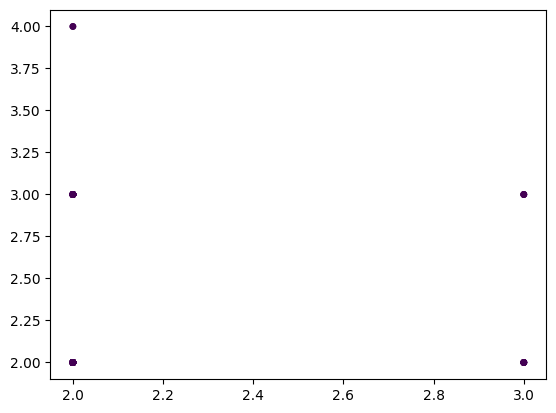

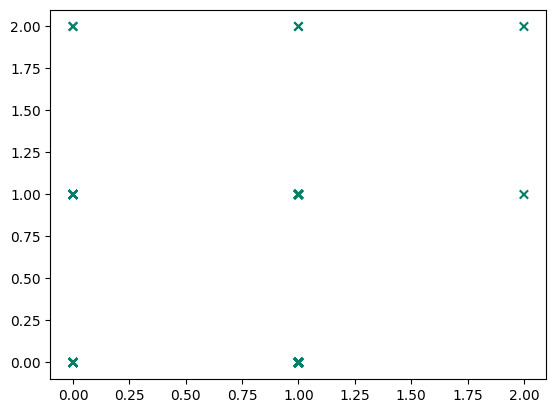

In [5]:
def createFeatures(trainSeqs:list, num_sample=100):
    """
    Créer deux features pour chaque séquence: x1 = nombre de AG et x2 = nombre de TA 
    entrée trainSeqs : list de séquences 
    entrée num_sample : nombre d'échantillons 
    sortie X : numpy array contenant deux feature pour chaque séquence
    """
    dim = (num_sample, 2)
    X = np.zeros(dim)
    lenliste=len(trainSeqs)
    nbTA=0
    nbAG=0
    
    for i in range (lenliste):
        seq=trainSeqs[i]
        for j in range(len(seq)-2+1):
            motif = seq[j:j+2]
            if(motif=='AG'):
                nbAG+=1
            elif (motif=='TA'):
                nbTA+=1
        
        #On màj les features et ré-initialisons les variables tmp pour la prochaine séquence
        X[i,0]=nbAG
        X[i,1]=nbTA
        
        nbTA=0
        nbAG=0
        
    return X

#AGTATAG, au minimum dans la liste pos on retrouve pr chaque séquence nbAG=2 et nbTA=2
Xpos = createFeatures(pos) #Matrice des caractéristiques par séquences
Xneg = createFeatures(neg)

yPos = np.ones(num_sample)  #Label à 1 pour tt les séquences avec le motif 
yNeg = np.zeros(num_sample) #Label à 0 pour tt les séquences avec le motif 
    
#Ploter les données
plt.scatter(Xpos[:,0], Xpos[:, 1],c=yPos, s=15) #En abscisse les données concernant AG et en. ordonnée ceux concernant TA
plt.show()

plt.scatter(Xneg[:,0], Xneg[:, 1], c=yNeg, marker='x', cmap='summer')
plt.show()

#Normaliser les données entre 0 et 1
X = np.vstack((Xpos, Xneg))
x_norm = (X-np.min(X))/(np.max(X)-np.min(X))
X = x_norm


## 2. Construction d'un neurone artificiel
2.1 Faire une fonction pour initialiser avec des valeurs aléatoires la matrice W et b

In [6]:
def initialisation(X):
    """
    Initialiser avec des valeurs aléatoires la matrice W et b
    entrée X: matrice de features
    sortie W: matrice de poids du reseau
    sortie b: bias
    """
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)

    return (W, b)

W, b = initialisation(X)
print(W)

[[-0.03307148]
 [ 0.72480942]]


2.2 Faire une fonction qui calcule la fonction d'ativation du neurone 

In [7]:
def model(X, W, b):
    """
    Calcule Z puis A
    entrée X: matrice de features
    entrée W: matrice de poids du reseau
    entrée b: bias
    sortie A: valeur de la fonction d'ativation
    """
    Z = X.dot(W) + b
    A = 1/(1 + np.exp(-Z)) #Pour chaque échnatillon on détermine sa proba d'apartennir à la classe 1
    return A

A = model(X, W, b)
#X caractéristiques de notre échantillon de séquence
#print(A.shape) 200 échantillons dans X donc 200 activations matrice 200*1

2.2 Faire la fonction logLoss

In [8]:
def log_loss(A, y):
    """
    Calcule log_loss basée en A et y
    entrée A: vecteur contenant les valeurs de fonctions d'activation pour les num_sample*2
    entrée y: vecteur de labels donc sa taille ets le nbr d'échantillons
    sortie ll: logLoss
    """
    ll = (1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A)))
    
    return ll

testlogloss=log_loss(A, y) 
#Dimension de A activation de l'échantillon et y données de référence : 200*1
#print(testlogloss)

2.3 Faire la fonction qui calcule les gradients

In [9]:
def gradients(A, X, y):
    """
    Calcule les gradients dW et db
    entrée A: vecteur contenant les valeurs de fonctions d'activation pour num_sample*2
    entrée X: matrice de features
    entrée y: vecteur de labels
    sortie dW: les gradients de W
    sortie db: le gradients de b
    """
    
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    
    return (dW, db)

#testdW,testdb = gradients(A, X, y)
#dW dimension (2,1) comme W et db un entier 

2.4 Faire la fonction pour mettre à jours les parametre W et b

In [10]:
def update(dW, db, W, b, learning_rate):
    """
    Mettre à jour W et b
    entrée dW: les gradients de W
    entrée db: le gradient de b
    entrée W: matrice de poids W
    entrée b: bias
    entrée learning_rate: pas d'aprentissage
    sortie W: W mis à jour
    sortie b: b mis à jour
    """
    
    W = W - learning_rate * dW
    b = b - learning_rate * db
   
    return (W, b)

2.5 Faire la fonction pour entraîner un neurone artificiel

In [11]:
def backPropagation(X, y, learning_rate = 0.08, n_iter = 30): #On passe les donnée du model X et ceux de référence sous forme d'activation dans y
    """
    Implemente l'algorithme backpropagation
    entrée X: matrice de features
    entrée y: vecteur de labels
    entrée learning_rate: pas d'aprentissage
    entrée n_iter: nombre d'iteration ou epoch
    sortie W: W à la fin de l'entrainement 
    sortie b: b à la fin de l'entrainement 
    sortie Loss: List contenant les valeur de la fonction logLoss à chaque iteration
    """ 
    # initialisation W, b
    W, b = initialisation(X)
    Loss = []
    
    #boucle d'apprentissage pour le neurone artificiel
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate) 

    return (W, b, Loss)

W, b, Loss = backPropagation(X, y, 0.5, 600)
print (X.shape)


(200, 2)


2.6 Ploter les valeurs de LogLoss pour voir si ça diminue au cours des epochs

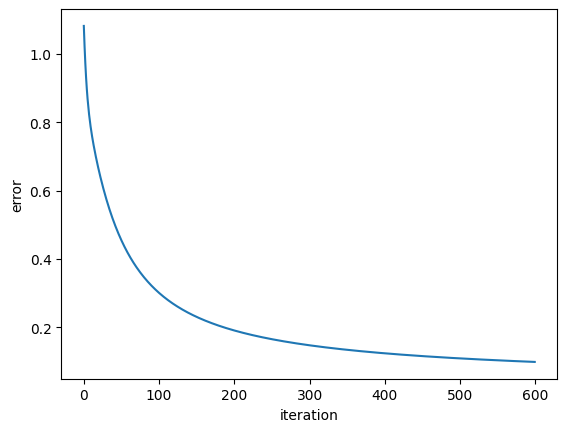

In [12]:
plt.plot(Loss)
plt.xlabel("iteration")
plt.ylabel("error")
plt.show()

2.7 Faire une fonction Predict qui renvoie 1 si la probabilité donnée par le model est supérieure ou égale à 0.5, 0 sinon

In [13]:
def predict(X, W, b):
    """
    Predire le label de donnees X en ulisant parametre W, b
    entrée X: matrice de features
    entrée W: matrice de poids W
    entrée b: bias
    sortie A: 1 si la probalité donnee par le model est superieur ou egale à 0.5, 0 sinon 
    """ 
    A = model(X, W, b)
    #print(A)
    return A >= 0.5

2.8 Afficher l'accuracy du model sur les données d'entrainement.

In [14]:
"""
from sklearn.metrics import accuracy_score

y_pred = predict(X, W, b)
print(accuracy_score(y, y_pred))

"""
    
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

y = y.reshape((y.shape[0], 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

y_pred = predict(X, W, b)
#print(y_pred)
print(accuracy_score(y, y_pred))
    

0.98


## 3. Amelioration du modèle

3.1 Quel est la performance du modèle? Changer les paramètres learning_rate et n_iter pour améliorer la performance. Comment ces deux paramètres influencent la accuracy?

<font color='blue'>
Le modèle est performant puisque dans 98% les décisions prises sont correctes, il s'avère qu'en augmentant learning_rate le neurone artificielle apprend moins rapidement puisque lors des maj avec update les pondérations W = W - learning_rate * dW on soustrait à W courant de plus petite valeur. Ça nous permettrait tout de même de renforcer nos paramètres de pondération avec plus de précision et obtenir ainsi de meilleure prédiction... le nombre d'itérations effectué pour exécuter l'algorithme d'apprentissage back propagation influe également sur l'apprentissage du neurone et plus il est important davantage nous obtenons un résultat pertinent, cela dit si la mearning_rate n'est pas bien choisit meme en itérant un grand nombre de fois nous réduirons pas les erreurs entre le model et y lors de l'apprentissage. learning_rate et y vont de pair.

Plus nous augmentons le nombre d'itérations, plus nous nous rapprochons d'un log_loss=0 cad un idéal dans nos prédictions où le neurone prédirait de façon optimale le résultat attendue.

Par conséquent, ces deux paramètres sont déterminants pour l'accuracy puisqu'elles permettent au neurone d'apprendre au mieux donc réduire les différences entre les prédictions y_pred du neurone et nos faits actés y, l'accuracy se rapproche donc de 100%.

Cependant, nous pouvons ne jamais atteindre 100% puisque nos séquences négatives sont générer aléatoirement donc elles peuvent avoir des carctéristiques X qui font qu'elles se rapproche tout de meme d'un échantillon/séquence de classe 1 et donc mm en essayant de réduire les erreurs log loss avec le gradient et update, l'activation reste incorrect et l'idée serait donc de jouer sur la learning_rate lors des màj avec le gradient pour franchir plus rapidement la barriere de décision pour cet échantillon. 

</font>

3.2 Ajouter d'autre features comme par exemple d'autre dinucléotides, ou trinucleotides et réentraîner le modèle. 

In [15]:
def createFeatures(trainSeqs:list, num_sample=100):
    """
    Create plusieurs features pour représenter le motif
    entrée trainSeqs : list de séquences d'entrainement
    entrée num_sample : nombre d'échantillons 
    sortie X : numpy array contenant plusieurs features pour chaque séquence
    """
    dim = (num_sample, 4)
    X = np.zeros(dim)
    lenliste=len(trainSeqs)
    nbTA=0
    nbAG=0
    nbGT=0 #Y'en a au minimum 1 pour les séquences pos générer artificiellement
    nbAT=0 #Au minimum 1 pour les séquences pos
    
    for i in range (lenliste):
        seq=trainSeqs[i]
        for j in range(len(seq)-2+1):
            motif = seq[j:j+2]
            if(motif=='AG'):
                nbAG+=1
            elif (motif=='TA'):
                nbTA+=1
            elif(motif=='GT'):
                nbGT+=1
            elif (motif=='AT'):
                nbAT+=1
        
        #On màj les features et ré-initialisons les variables tmp pour la prochaine séquence
        X[i,0]=nbAG
        X[i,1]=nbTA
        X[i,2]=nbGT
        X[i,3]=nbAT
        
        nbTA=0
        nbAG=0
        nbGT=0 
        nbAT=0

    return X

Xpos = createFeatures(pos)
Xneg = createFeatures(neg)
X = np.vstack((Xpos, Xneg))
x_norm = (X-np.min(X))/(np.max(X)-np.min(X))
X = x_norm


3.3 Réentraîner le modèle et comparer les performances.

(200, 4)


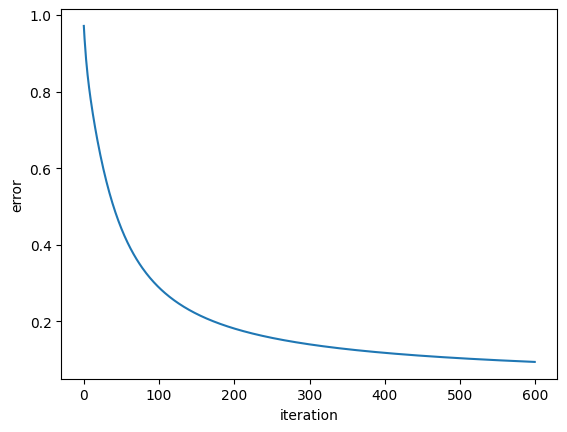

0.98


In [16]:
#Entrainer 
W, b, Loss = backPropagation(X, y, 0.5, 600)
print (X.shape)
plt.plot(Loss)
plt.xlabel("iteration")
plt.ylabel("error")
plt.show()

y_pred1 = predict(X, W, b)
print(accuracy_score(y, y_pred1))

<font color='blue'>
En ajoutant comme features d'autres dinucléotides, en l'occurrence 'GT' et 'AT' qui sont présents dans le motif AGTATAG implanté dans les séquences labélisées 1, on ré-entraine notre neurone.

On exécute backPropagation avec différents nombres d'itération, 
    
1/------- nb_iter = 10 ----------- 
Il n'est ainsi créée que 10 modèles intermédiairement lors du processus d'apprentissage... on a donc à chaque fois des proba d'activation A pour nos séquences qui admettent des erreurs par rapport à nos labels y vérifiés, le nb_iter est trop faible pour permettre aux paramètres de pondération W et b d'être màj et permettre aux neurones d'apprendre. Ainsi pour un autre échantillon ajouté à la liste, il est probable que le neurone prenne une mauvaise décision pour ce qui est de son appartenance à la classe 0 ou 1 car les paramètres de pondérations ne sont toujours pas ceux permettant au neurone d'émettre de bonne prédiction. L'accuracy_score(y, y_pred1) n'est que de 0,73 et log_loss diminue de 0,74 à 0,64.

2/ ------- nb_iter = 600 ----------- 
Les résultats sont bien plus intéressants, les erreurs (log loss) entre le model et y qui initialement était de 1.2 diminue à 0.1 (les erreurs sont drastiquement réduites entre les activations A déterminées par le neurone A et celles vérifiés Y). Les prédictions sont susceptibles d'être plus correcte avec les paramètres de pondération W et b ici déterminer grâce à backPropagation. On pourrait ainsi définir une fonction linéaire avec X les caractéristiques, W les pondérations et b le biais qui nous retournerait ainsi peu importe les séquences d'entrées de bonnes prédictions. 1 = a le motif/séquences d'intérêt ou 0= abs du motif/séquences d'intérêt. L'accuracy entre y et y_pred est ici de 0.985 et témoigne d'une plus grande fiabilité. Noius avons donc un model intéressant ici pour les caractéristiques/Features choicit of course, si on change de feature faut chnager de model.
    
Pour un meme nb d'itération (600) en augmentant la vitesse d'apprentissage (learning_rate) de 0.5 à 7... on constate que log_loss passe le seuil de 0.1 plus rapidement cad au bout d'une quentaine d'itération, initialement on passait le seuil de 0.1 au bout de 400 itérartion. Les erreurs sont encore plus réduite et l'accuracy est de 0.995 cette fois... on a plus de vraisemblance. 

#JOUER AUSSI SUR LA VITESSE D'APPRENTISSAGE POUR VOIR COMMENT ÇA ÉVOLUE 
</font>

## 4. Tester sur vous données de chip-seq
4.1 Vous avez peut-être une idée du motif caché dans vos données.
Entraîner un modèle spécifique pour reconnaître le motif d'intérêt.
Telechargé la matrice de frequence du motif d'intérêt sur le site https://jaspar.genereg.net/, chercher par le nom du motif, puis copie sa matrice de frequence. Voici un exemple pour le motif AFT1

In [18]:
#>AFT1 à remplacer par la matrice du motif d'interet

"""
freq = np.array([
[106,155,362,179,426,136,716,145,34,160,10,961,8,25,19,181,265,287,276,123,154],
[205,249,197,396,231,78,25,31,47,10,966,9,972,955,740,257,252,155,180,225,236],
[231,220,221,222,154,142,31,288,39,812,11,15,9,2,13,494,241,183,68,357,458],
[456,374,218,200,187,641,226,535,878,16,10,14,10,16,225,65,240,373,474,292,150]
])

motif_length = 21 # à remplacer par taille de la matrice du motif d'interet
num_sample = 100

"""

#Nos motif d'intérèt sont Mac1 et ATM1. Nous allons entrainer ici un neurone artificielle pour MAC1 ='TTTGCTCA'

freq = np.array([
[108,89,0,115,0,0,0,958],
[0,0,0,0,1714,0,1714,0],
[0,219,0,1599,0,0,0,655],
[1632,1451,1714,0,0,1714,0,113]
])

motif_length = 8 # à remplacer par taille de la matrice du motif d'interet
num_sample = 100
posTest, negTest  = createArtSequences(freq, num_sample)

print("POSSSSSSSS\n", posTest)
print("NEGGGGGGGG\n",negTest)

POSSSSSSSS
 ['TTTGCTCATG', 'AATTTGCTCA', 'CTTTGCTCAT', 'TTTTTGCTCA', 'TTTGCTCAAG', 'ATTTGCTCAA', 'TTTGCTCACA', 'TTTGCTCACC', 'TTTTGCTCAC', 'CTTTGCTCAG', 'GTTTGCTCAC', 'ACTTTGCTCA', 'TTTGCTCATT', 'TTTGCTCAAA', 'ACTTTGCTCA', 'TTTGCTCAAG', 'GTTTGCTCAC', 'TGTTTGCTCA', 'GATTTGCTCA', 'GATTTGCTCA', 'CTTTGCTCAG', 'TATTTGCTCA', 'ATTTGCTCAT', 'CATTTGCTCA', 'AATTTGCTCA', 'CTTTGCTCAG', 'TTTGCTCAAC', 'ATTTTGCTCA', 'TTTGCTCAAA', 'AATTTGCTCA', 'TTTTGCTCAA', 'GTTTGCTCAC', 'TCTTTGCTCA', 'TTTGCTCACG', 'TTTGCTCAGA', 'ATTTGCTCAC', 'TTTGCTCATA', 'ATTTGCTCAT', 'TTTGCTCAGG', 'CTTTGCTCAC', 'CCTTTGCTCA', 'CCTTTGCTCA', 'GTTTGCTCAG', 'ATTTGCTCAC', 'TTTTGCTCAC', 'TTTGCTCACA', 'TTTGCTCAAT', 'CTTTGCTCAT', 'TTTGCTCAAC', 'TTTTTGCTCA', 'ATTTGCTCAG', 'CATTTGCTCA', 'ATTTGCTCAA', 'TTTGCTCAGA', 'GTTTGCTCAT', 'GGTTTGCTCA', 'TTTGCTCATC', 'CTTTGCTCAA', 'TTTGCTCAAG', 'CTTTTGCTCA', 'CATTTGCTCA', 'CTTTGCTCAG', 'ACTTTGCTCA', 'TTTTGCTCAC', 'CTTTTGCTCA', 'GTTTGCTCAA', 'AATTTGCTCA', 'GTTTGCTCAT', 'TTTGCTCAGA', 'TTTTGCTCAC', 'CTTTGC

4.2 Recoder la fonction ``createFeatures`` pour créer un ensemble de features qui représentent bien le motif d'intérêt. Vous  pouvez utiliser autant de features qui vous souhaitez.

In [19]:
def createFeatures(trainSeqs:list, num_sample=100):
    """
    Create features pour representer le motif d'interet
    entrée trainSeqs : list de séquences 
    entrée num_sample : nombre d'échantillons 
    sortie X : numpy array contenant deux feature pour chaque séquence
    """
    #MOTIFMAC1:'TTTGCTCA'
    dim = (num_sample, 3)
    X = np.zeros(dim)
    lenliste=len(trainSeqs)
    nbTT=0 
    nbTGC=0
    nbTCA=0
    
    for i in range (lenliste):
        seq=trainSeqs[i]
        for j in range(len(seq)-3+1):
            mot3 = seq[j:j+3]
            mot2=seq[j:j+2]
            if(mot2=='TT'):
                nbTT+=1
            elif (mot3=='TGC'):
                nbTGC+=1
            elif (mot3=='TCA'):
                nbTCA+=1
           
            #Si on arrive à la fin de la sequence cad la dernier itération avec j=len(seq)-3+1 il ne faut pas oublier de faire le test pour le dernier motif de taille2 avant de sortir du for
            if(j==len(seq)-3):
                mot2=seq[-2:]
                #print(mot2)
            
        #On màj les features et ré-initialisons les variables tmp pour la prochaine séquence
        X[i,0]=nbTT
        X[i,1]=nbTGC
        X[i,2]=nbTCA
        
        nbTT=0
        nbTGC=0
        nbTCA=0
    
    return X

#Faire des test avec des caracteristiques autres, par exemple x1 = TTTG et x2=CTCA comme features pour voir si ça améliore les perf, je compte mal mon TT ici

In [20]:
Xpos = createFeatures(posTest)
Xneg = createFeatures(negTest)
X = np.vstack((Xpos, Xneg))
x_norm = (X-np.min(X))/(np.max(X)-np.min(X))
X = x_norm

In [21]:
yTest = np.concatenate((np.ones(num_sample), np.zeros(num_sample)))
yTest = yTest.reshape((yTest.shape[0], 1))
y.shape

(200, 1)

4.4 Réentraîner le modèle et ajuster les paramètres à fin d'obtenir la meilleure performance.

(200, 3)


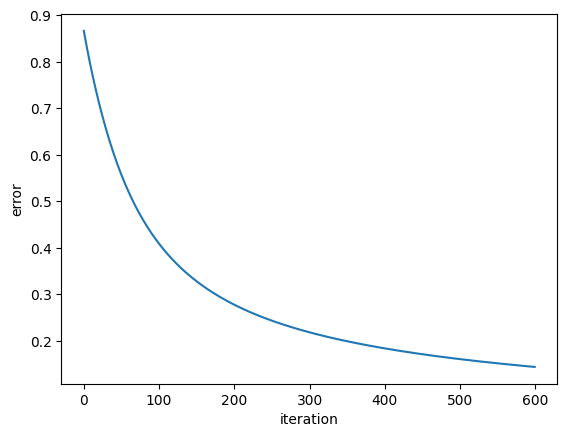

0.965


In [22]:
#Entrainer 
W, b, Loss = backPropagation(X, yTest, 0.46, 600)
print (X.shape)
plt.plot(Loss)
plt.xlabel("iteration")
plt.ylabel("error")
plt.show()

y_pred2 = predict(X, W, b)
print(accuracy_score(yTest, y_pred2))

#Améliorer la perfomarance en jouant sur les itérations, le learning_rate et caractéristique éventuellement à changer

4.5 Lire votre fichier et charger les séquences.

In [23]:
def readFasta(genome):
    sequence = []
    file = open(genome, "r")
    sequences = []
    seq = ""
    for s in file:
        if s[0] != ">":
            seq += s.strip().upper()
        else:
            sequences.append(seq)
            seq = ""
    return sequences[1:]
genome = "Sequence_by_Peaks_1.fasta"
seq= readFasta(genome)
#print(seq)
sequence = readFasta(genome)[0] #Juste la première séquence chipseq du fichier
print(sequence)

TTTCAAACTTTGGTCTTCTGAACCTCTTCCAAGTACAACAGAAATCAAGAGAGCCCACAGTAACGTTTTGTTCTTGCTGACTTACTGGAGTGAATGAATGAGTTGAGATGAAACAACTCCCATGGCCCCCAAACATAACCAAAAGAAAACAGCTTTGTTGAAGTTCTCCAGAAGAAGACTACAGAAGTAACACTCGTTAAAACTGCTATAAAACGTGTAACTGTTGTATGGGACTGCAAAATGGATAAGACTTGGCTTTGCCTTTTCAGCACATTTGCTCTTCAAAGAAATTGAATATCCTTCTATCCAATCAGATCATGAAGACTATGGCTTTGAGATGAGAACGGGGGTGCAATTTGAGTGGTGTGCAGCCAATAAAACAGTAGATCCCGTATTTCAAAAATTGCACCCGGTTTTCTTTTCTCGTTCGTACAGCTCTTTCTGAATTGCACCCTTTTTTCATATGAACTGCAGTGTTACCTAGATCAAGTGGGGGGGTGGCAGGTGGCTATTTCTGCCTTCTACAGCGCTTTTAGTGAACTTTTGCTTTGTTGTAATTGTAGTTGTATTTCTGTGTGTTACGTGAAATACCGTGCCTTTGTCTATCATTCTTTCAGTGGTTTTGCTCGCAGAGATGGGGCATTTTGATCCATTGTGTGTTAAAGCACAGTGGGACCCAGGAATAGTAGAGAGAAGGAAAGTGGGGGAAGGGTAGCAGTGGGGCCGGAAGGAGAACGTTCTATTCTACAGCATATCTTGTTCTGTTCTCCTGAATGATATATTCTCTCCTGCCAGTCTTCTAACTTCGGTTCCATTGAACAATAATGATGTCGTTGCGAGTGGTGAAACTC


4.6 Faire une fonction pour parcourir votre séquence et conter combien de fois le modèle prédire le motif, exprimer en pourcentage.

In [24]:
def predireMotif(sequence:str, motif_length:int, W, b):
    """
    Prédire les positions des motifs et calculer le pourcentage d'apparition du motif.
    entrée sequence : sequence de nucleotides 
    entrée motif_length : taille du motif
    entrée W: matrice de poids W
    entrée b: bias
    sortie perc : pourcentage d'aparission du motif

    """
    countMotif =0; countTotal = 0
    lenseq= len(sequence)
    listMotifSéquence=[]
    
   #Création d'une liste avec tout les motifs de meme taille que le motif d’intérêt
    for j in range(len(sequence)-motif_length+1):
        motif=sequence[j:j+motif_length]
        listMotifSéquence.append(motif)
        countTotal+=1
    #Création des caractéristiques pour chaque motif de la liste de motifs
    Xseq= createFeatures(listMotifSéquence,countTotal)
    #Pour chaque motif de la liste, détermine si neurone artificiel entrainer renvoie 1 OU 0
    y_pred = predict(Xseq, W, b) 
    
    for i in range(len(y_pred)):
        if y_pred[i]==True:
            countMotif+=1
    #print(countMotif)

    #Retourne le pourcentage, rapport entre 1 renvoyer par le neurone sur le nombre de motif total
    return  (countMotif/countTotal)

percMotif = predireMotif(sequence, motif_length,W, b)
print (percMotif)  

0.5165876777251185


4.7 Pour contrôler que le pourcentage d'apparition du motif d'intérêt et pas du au hasard, entraîner un modèle avec un autre motif et vérifier si le pourcentage du motif d'intérêt est supérieur.

(200, 3)


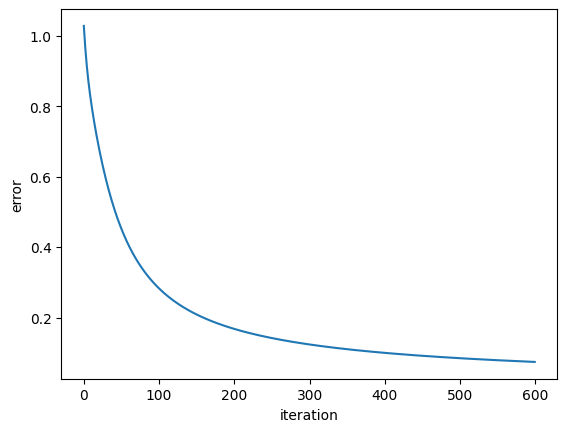

0.995
0.19451073985680192


In [36]:

def createFeatures(trainSeqs:list, num_sample=100):
    """
    Create features pour representer le motif d'interet
    entrée trainSeqs : list de séquences 
    entrée num_sample : nombre d'échantillons 
    sortie X : numpy array contenant deux feature pour chaque séquence
    """
    #MOTIFPdr1:TCCGCGGA
    dim = (num_sample, 3)
    X = np.zeros(dim)
    lenliste=len(trainSeqs)
    nbTC=0 
    nbCGC=0
    nbGGA=0
    
    for i in range (lenliste):
        seq=trainSeqs[i]
        for j in range(len(seq)-3+1):
            mot3 = seq[j:j+3]
            mot2=seq[j:j+2]
            if(mot2=='TC'):
                nbTC+=1
            elif (mot3=='CGC'):
                nbCGC+=1
            elif (mot3=='GGA'):
                nbGGA+=1
           
            #Si on arrive à la fin de la sequence cad la dernier itération avec j=len(seq)-3+1 il ne faut pas oublier de faire le test pour le dernier motif de taille2 avant de sortir du for
            if(j==len(seq)-3):
                mot2=seq[-2:]
                #print(mot2)
            
        #On màj les features et ré-initialisons les variables tmp pour la prochaine séquence
        X[i,0]=nbTC
        X[i,1]=nbCGC
        X[i,2]=nbGGA
        
        nbTC=0
        nbCGC=0
        nbGGA=0
    
    return X

#Test avec Pdr1 ='TCCG(C/T)GGA'

freq = np.array([
[8,0,0,13,2,8,10,62],
[28,100,100,0,88,2,3,8],
[15,0,0,87,8,88,83,22],
[48,0,0,0,2,2,3,8]
])

"""freq = np.array([
[29,29,18,2,1,7,72,0,2,1,132,105,42,45],
[47,32,16,9,140,130,1,132,1,1,1,8,38,29],
[36,37,6,0,0,3,70,0,138,142,7,19,37,42],
[32,46,104,133,3,4,1,12,3,0,4,12,27,28]
])"""

motif_length = 14 # à remplacer par taille de la matrice du motif d'interet
num_sample = 100
posTestt, negTestt  = createArtSequences(freq, num_sample)

#print("POSSSSSSSS\n", posTestt)
#print("NEGGGGGGGG\n",negTestt)

#Création des carctéristiques
Xposs = createFeatures(posTestt)
Xnegg = createFeatures(negTestt)
X = np.vstack((Xposs, Xnegg))
x_norm = (X-np.min(X))/(np.max(X)-np.min(X))
X = x_norm
yTestt = np.concatenate((np.ones(num_sample), np.zeros(num_sample)))
yTestt = yTestt.reshape((yTestt.shape[0], 1))
y.shape

#Entrainement
W, b, Losss = backPropagation(X, yTestt, 0.46, 600)
print (X.shape)
plt.plot(Losss)
plt.xlabel("iteration")
plt.ylabel("error")
plt.show()

y_pred3 = predict(X, W, b)
print(accuracy_score(yTestt, y_pred3))

#Test predireMotif
percMotiff = predireMotif(sequence, motif_length,W, b)
print (percMotiff)  


In [ ]:
On obtient en effet un pourcentage moindre 